In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 100.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 93.4 MB/

In [2]:
import pandas as pd
nasa_data = pd.read_csv("/content/map_object_list.csv")
nasa_data.head()

,type,name,glon,glat,distance (parsecs),x (parsecs),y (parsecs),z (parsecs),radius (parsecs),log10 age (years),Arm (masers),Source
0,maser,G351.44+00.65,351.44,0.65,1329.0,1314.111083,-197.802309,15.076703,NaN,NaN,Sgr,2019ApJ...874...94W
1,maser,G011.49-01.48,11.49,-1.48,1250.0,1224.540716,248.913063,-32.285001,NaN,NaN,Sgr,2019ApJ...874...94W
2,maser,G014.33-00.64,14.33,-0.64,1119.0,1084.116100,276.942332,-12.499090,NaN,NaN,Sgr,2019ApJ...874...94W
3,maser,G014.63-00.57,14.63,-0.57,1831.0,1771.545918,462.443798,-18.215177,NaN,NaN,Sgr,2019ApJ...874...94W
4,maser,G015.03-00.67,15.03,-0.67,2004.0,1935.311186,519.651302,-23.433653,NaN,NaN,Sgr,2019ApJ...874...94W


In [3]:
missing_values = nasa_data.isnull().sum()
duplicates = nasa_data.duplicated().sum()

missing_values, duplicates

(type                     0
 name                     0
 glon                     0
 glat                     0
 distance (parsecs)       0
 x (parsecs)              0
 y (parsecs)              0
 z (parsecs)              0
 radius (parsecs)       243
 log10 age (years)      475
 Arm (masers)          2400
 Source                 234
 dtype: int64,
 0)

In [4]:
data = nasa_data.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = nasa_data.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2429, 12)
Unseen Data For Predictions: (128, 12)


In [5]:
from pycaret.clustering import *
exp_clu101 = setup(data, normalize = True, session_id = 123, use_gpu=True)

,Description,Value
0,Session id,123
1,Original data shape,"(2429, 12)"
2,Transformed data shape,"(2429, 2886)"
3,Numeric features,7
4,Categorical features,5
5,Rows with missing values,100.0%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [6]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0200,2.6135,20.4019,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,type,name,glon,glat,distance (parsecs),x (parsecs),y (parsecs),z (parsecs),radius (parsecs),log10 age (years),Arm (masers),Source,Cluster
0,open cluster,UBC 633,231.180649,1.548266,5763.688965,-3611.747559,-4489.001465,155.729385,12.544165,unknown,NaN,2020A&A...635A..45C,Cluster 3
1,open cluster,UBC 523,302.441986,-3.337696,3225.806396,1727.533325,-2717.753418,-187.809174,3.278100,unknown,NaN,2020A&A...635A..45C,Cluster 3
2,open cluster,IC_4996,75.370003,1.308000,1936.599976,489.011261,1873.321411,44.206619,0.946401,7.15,NaN,2020A&A...633A..99C,Cluster 1
3,open cluster,FSR_1452,267.585999,-2.030000,2549.199951,-107.304367,-2545.339355,-90.299728,2.491549,9.05,NaN,2020A&A...633A..99C,Cluster 3
4,open cluster,Westerlund_1,339.545990,-0.401000,3558.000000,3333.597412,-1243.331421,-24.901421,1.428273,6.9,NaN,2020A&A...633A..99C,Cluster 3


In [8]:
plot_model(kmeans)

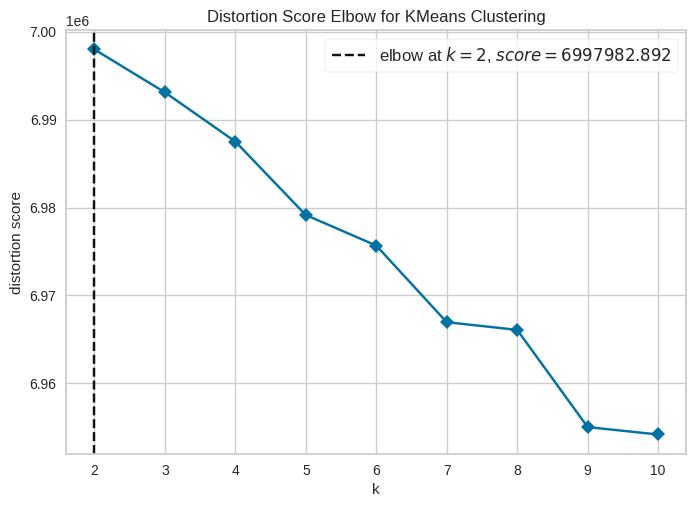

In [9]:
plot_model(kmeans, plot = 'elbow')

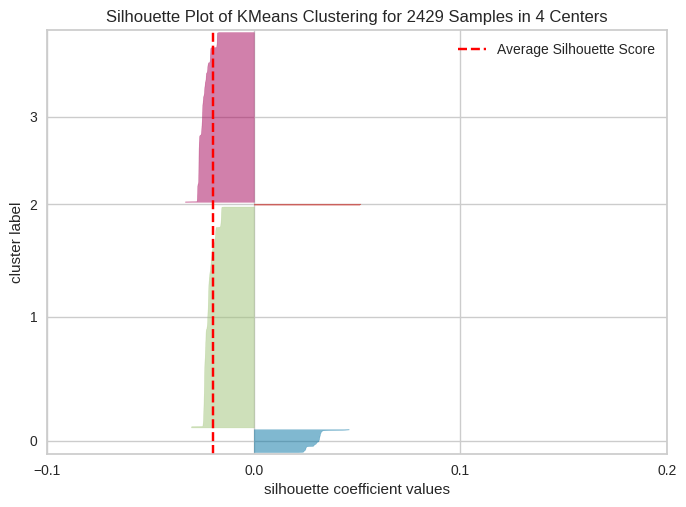

In [10]:
plot_model(kmeans, plot = 'silhouette')

In [11]:
plot_model(kmeans, plot = 'distribution')

In [13]:
plot_model(kmeans, plot = 'distribution', feature = 'distance (parsecs)')

In [14]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,type_open cluster,type_maser,type_hii region,type_ob association,name_UBC 633,name_UBC 523,name_IC_4996,name_FSR_1452,name_Westerlund_1,name_NGC_6709,...,Arm (masers)_Con,Arm (masers)_3-k,Source_2020A&A...635A..45C,Source_2020A&A...633A..99C,Source_2019ApJ...874...94W,Source_2017AstBu..72..122R,Source_1978ApJS...38..309H,Source_2014ApJ...783..130R,Source_2019ApJS..245...32L,Cluster
0,-2.094232,-0.251963,3.153005,-0.189264,-0.020294,-0.020294,-0.020294,-0.020294,-0.020294,-0.020294,...,-0.020294,-0.028706,-0.507836,0.700131,-0.106022,-0.122653,-0.189264,-0.186918,-0.174778,Cluster 1
1,-2.094232,-0.251963,3.153005,-0.189264,-0.020294,-0.020294,-0.020294,-0.020294,-0.020294,-0.020294,...,-0.020294,-0.028706,-0.507836,0.700131,-0.106022,-0.122653,-0.189264,-0.186918,-0.174778,Cluster 1
2,-2.094232,-0.251963,3.153005,-0.189264,-0.020294,-0.020294,-0.020294,-0.020294,-0.020294,-0.020294,...,-0.020294,-0.028706,-0.507836,0.700131,-0.106022,-0.122653,-0.189264,-0.186918,-0.174778,Cluster 1
3,-2.094232,-0.251963,3.153005,-0.189264,-0.020294,-0.020294,-0.020294,-0.020294,-0.020294,-0.020294,...,-0.020294,-0.028706,-0.507836,0.700131,-0.106022,-0.122653,-0.189264,-0.186918,-0.174778,Cluster 1
4,-2.094232,-0.251963,3.153005,-0.189264,-0.020294,-0.020294,-0.020294,-0.020294,-0.020294,-0.020294,...,-0.020294,-0.028706,-0.507836,0.700131,-0.106022,-0.122653,-0.189264,-0.186918,-0.174778,Cluster 1


In [15]:
save_model(kmeans,'DB Scan Model for Gaia Astronomical Data')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['glon', 'glat',
                                              'distance (parsecs)',
                                              'x (parsecs)', 'y (parsecs)',
                                              'z (parsecs)',
                                              'radius (parsecs)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['type', 'name',
                                              'log10 age (years)',
                                              'Arm (masers)', 'Source'],
                                     transformer=SimpleImputer(s...
                 ('onehot_encoding',
                  TransformerWrapper(include=['type', 'name',
                                              'log10 age (years)',
                                          

In [17]:
saved_kmeans = load_model('DB Scan Model for Gaia Astronomical Data')
new_prediction = predict_model(saved_kmeans, data=data_unseen)
new_prediction.head()

Transformation Pipeline and Model Successfully Loaded


,type,name,glon,glat,distance (parsecs),x (parsecs),y (parsecs),z (parsecs),radius (parsecs),log10 age (years),Arm (masers),Source,Cluster
0,hii region,Sh 2-121,90.230003,1.72,5659.0,-22.716940,5659.034180,169.934708,0.823451,NaN,NaN,NaN,Cluster 1
1,hii region,Sh 2-124 (Violin nebula),94.550003,-1.57,3393.0,-269.221497,3383.036377,-93.017197,34.566051,NaN,NaN,NaN,Cluster 1
2,hii region,Sh 2-127,96.290001,2.60,7666.0,-839.963806,7620.491211,348.140259,2.232435,NaN,NaN,NaN,Cluster 1
3,hii region,BFS 8,96.290001,-0.17,6930.0,-759.329163,6888.940430,-20.563749,5.040143,NaN,NaN,NaN,Cluster 1
4,hii region,Sh 2-128,97.500000,3.16,6480.0,-845.902283,6425.265625,357.789551,0.944016,NaN,NaN,NaN,Cluster 1
